In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder

# Suppress the SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'


data = pd.read_csv("mudah-apartment-kl-selangor.csv")
data

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,RM 4 200 per month,Kuala Lumpur - Taman Desa,Condominium,5,2.0,6.0,1842 sq.ft.,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,NaN,RM 2 300 per month,Kuala Lumpur - Cheras,Condominium,3,1.0,2.0,1170 sq.ft.,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,NaN,RM 1 000 per month,Kuala Lumpur - Taman Desa,Apartment,3,NaN,2.0,650 sq.ft.,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,RM 1 700 per month,Kuala Lumpur - Sentul,Apartment,2,1.0,2.0,743 sq.ft.,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,NaN,RM 1 299 per month,Kuala Lumpur - Mont Kiara,Service Residence,1,1.0,1.0,494 sq.ft.,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19986,100493687,Pangsapuri Gapura Bayu,NaN,RM 1 200 per month,Selangor - Kajang,Apartment,3.0,NaN,2.0,1000 sq.ft.,Partially Furnished,"Security, Parking, Lift, Minimart, Multipurpos...",Near KTM/LRT,Selangor
19987,100371347,BSP 21,2018.0,RM 1 300 per month,Selangor - Bandar Saujana Putra,Service Residence,4.0,2.0,3.0,1427 sq.ft.,Partially Furnished,"Jogging Track, Barbeque area, Playground, Swim...","Air-Cond, Cooking Allowed",Selangor
19988,100493228,Ameera Residence,NaN,RM 1 350 per month,Selangor - Kajang,Condominium,3.0,2.0,2.0,1270 sq.ft.,Partially Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Air-Cond, Cooking Allowed, Washing Machine",Selangor
19989,100235153,The Arc @ Cyberjaya,NaN,RM 1 200 per month,Selangor - Cyberjaya,Service Residence,3.0,1.0,2.0,1100 sq.ft.,Fully Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...","Cooking Allowed, Washing Machine",Selangor


In [3]:
# Display basic dataset information
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()


Dataset Shape: (19991, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19043 non-null  object 
 2   completion_year        10806 non-null  float64
 3   monthly_rent           19989 non-null  object 
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19985 non-null  object 
 7   parking                14289 non-null  float64
 8   bathroom               19985 non-null  float64
 9   size                   19991 non-null  object 
 10  furnished              19986 non-null  object 
 11  facilities             17782 non-null  object 
 12  additional_facilities  14043 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(3

Removing non numerical objects in numerical attributes

In [4]:
import pandas as pd

# Example DataFrame
# df = pd.read_csv('your_dataset.csv')  # Uncomment and use your actual dataset
data['monthly_rent'] = data['monthly_rent'].str.replace(r'[^\d.]', '', regex=True)  # Remove all non-numeric characters
data['monthly_rent'] = pd.to_numeric(data['monthly_rent'], errors='coerce')  # Convert to float, set invalid values as NaN

data['size'] = data['size'].str.extract(r'([\d,.]+)')  # Extract numeric portion (digits, comma, or decimal)
data['size'] = data['size'].str.replace(',', '', regex=True)  # Remove commas (e.g., "1,842" -> "1842")
data['size'] = pd.to_numeric(data['size'], errors='coerce')  # Convert to float, invalid entries become NaN

data['rooms'] = pd.to_numeric(data['rooms'], errors='coerce')  # Convert to float, set invalid values as NaN


In [5]:
# Print the count of missing (null) values in each column of the 'data' DataFrame
print("\nMissing Values:")
data.isnull().sum()


Missing Values:


ads_id                      0
prop_name                 948
completion_year          9185
monthly_rent                2
location                    0
property_type               0
rooms                       8
parking                  5702
bathroom                    6
size                        0
furnished                   5
facilities               2209
additional_facilities    5948
region                      0
dtype: int64

In [6]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Sort columns by missing value percentage in descending order for better visibility
missing_percentage_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

missing_percentage_sorted

completion_year          45.945676
additional_facilities    29.753389
parking                  28.522835
facilities               11.049972
prop_name                 4.742134
rooms                     0.040018
bathroom                  0.030014
furnished                 0.025011
monthly_rent              0.010005
dtype: float64

In [7]:
# Imputation process

# 1. Numerical columns: Impute using the mean
numerical_columns = ['parking', 'rooms','bathroom','monthly_rent']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

data['completion_year'] = data['completion_year'].fillna(data['completion_year'].median())

# 2. Categorical columns: Impute using the mode
categorical_columns = [
    'prop_name', 'additional_facilities', 'facilities', 
    'furnished'
]
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Confirm that missing values have been addressed
missing_values_after_imputation = data.isnull().sum()

missing_values_after_imputation

ads_id                   0
prop_name                0
completion_year          0
monthly_rent             0
location                 0
property_type            0
rooms                    0
parking                  0
bathroom                 0
size                     0
furnished                0
facilities               0
additional_facilities    0
region                   0
dtype: int64

In [8]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19991 entries, 0 to 19990
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ads_id                 19991 non-null  int64  
 1   prop_name              19991 non-null  object 
 2   completion_year        19991 non-null  float64
 3   monthly_rent           19991 non-null  float64
 4   location               19991 non-null  object 
 5   property_type          19991 non-null  object 
 6   rooms                  19991 non-null  float64
 7   parking                19991 non-null  float64
 8   bathroom               19991 non-null  float64
 9   size                   19991 non-null  int64  
 10  furnished              19991 non-null  object 
 11  facilities             19991 non-null  object 
 12  additional_facilities  19991 non-null  object 
 13  region                 19991 non-null  object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.1+ 

,ads_id,prop_name,completion_year,monthly_rent,location,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,region
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Kuala Lumpur - Taman Desa,Condominium,5.0,2.000000,6.0,1842,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
1,100203973,Segar Courts,2017.0,2300.0,Kuala Lumpur - Cheras,Condominium,3.0,1.000000,2.0,1170,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur
2,100323128,Pangsapuri Teratak Muhibbah 2,2017.0,1000.0,Kuala Lumpur - Taman Desa,Apartment,3.0,1.416824,2.0,650,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Kuala Lumpur - Sentul,Apartment,2.0,1.000000,2.0,743,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur
4,97022692,Arte Mont Kiara,2017.0,1299.0,Kuala Lumpur - Mont Kiara,Service Residence,1.0,1.000000,1.0,494,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur


In [9]:
# Check for duplicates
print("\nDuplicate Rows:")
data.duplicated().sum() 


Duplicate Rows:


8

In [10]:
# Remove duplicates
data = data.drop_duplicates()

# Optionally, you can reset the index after removing duplicates
data.reset_index(drop=True, inplace=True)

print("\nAfter Remove Duplicate Rows:")
data.duplicated().sum()


After Remove Duplicate Rows:


0

In [11]:
# Check for irrelevant data (e.g., columns with the same value for all rows)
print("\nColumns with Single Unique Value:")
found = False  # Flag to check if any column with a single unique value is found

for col in data.columns:
    if data[col].nunique() == 1:
        print(col)
        found = True  # Set the flag to True if a column is found with a single unique value

# Print message if no column with a single unique value is found
if not found:
    print("No columns with single unique value found.")


Columns with Single Unique Value:
No columns with single unique value found.


Seperate the unique facilities in facilities to binary columns

In [12]:
# Define the unique features for facilities
facilities_features = [
    '10', '11', '6', 'Barbeque area', 'Club house', 'Gymnasium', 
    'Jogging Track', 'Lift', 'Minimart', 'Multipurpose hall', 
    'Parking', 'Playground', 'Sauna', 'Security', 
    'Squash Court', 'Swimming Pool', 'Tennis Court'
]

# Function to reorganize facilities based on priority
def reorganize_facilities(facilities):
    if pd.isna(facilities):  # Handle NaN values
        return facilities
    # Split the facilities into a list
    facilities_list = [facility.strip() for facility in facilities.split(',')]
    # Sort based on priority
    sorted_facilities = sorted(facilities_list, key=lambda x: facilities_features.index(x) if x in facilities_features else len(facilities_features))
    # Join back into a string
    return ', '.join(sorted_facilities)

# Apply the function to the 'facilities' column
data['facilities'] = data['facilities'].apply(reorganize_facilities)

# Display the updated 'facilities' column
print("Updated 'facilities' Column:")
print(data['facilities'])

# Function to check if a feature exists in the facilities list
def feature_presence(facilities, feature):
    if pd.isna(facilities):  # Handle NaN values
        return 0
    return 1 if feature in facilities else 0

# Add a binary column for each feature
for feature in facilities_features:
    data[feature] = data['facilities'].apply(lambda x: feature_presence(x, feature))

# Display the first few rows to verify
print("\nBinary Columns for Facilities Features:")
print(data[['facilities'] + facilities_features])


Updated 'facilities' Column:
0        Barbeque area, Gymnasium, Jogging Track, Lift,...
1        Barbeque area, Gymnasium, Jogging Track, Lift,...
2             Jogging Track, Lift, Minimart, Swimming Pool
3        Gymnasium, Lift, Minimart, Parking, Playground...
4        Barbeque area, Club house, Gymnasium, Jogging ...
                               ...                        
19978    Jogging Track, Lift, Minimart, Multipurpose ha...
19979    Barbeque area, Jogging Track, Playground, Saun...
19980    Gymnasium, Lift, Multipurpose hall, Parking, P...
19981    Barbeque area, Club house, Gymnasium, Jogging ...
19982    Barbeque area, Club house, Gymnasium, Jogging ...
Name: facilities, Length: 19983, dtype: object

Binary Columns for Facilities Features:
                                              facilities  10  11  6  \
0      Barbeque area, Gymnasium, Jogging Track, Lift,...   0   0  0   
1      Barbeque area, Gymnasium, Jogging Track, Lift,...   0   0  0   
2           Jogging T

Seperate the unique facilities in addtional_facilities to binary columns

In [13]:
# Define the priority order for features
priority_features = ['Air-Cond', 'Cooking Allowed', 'Internet', 'Near KTM/LRT', 'Washing Machine']

# Function to reorganize facilities based on priority
def reorganize_facilities(facilities):
    if pd.isna(facilities):  # Handle NaN values
        return facilities
    # Split the facilities into a list
    facilities_list = [facility.strip() for facility in facilities.split(',')]
    # Sort based on priority
    sorted_facilities = sorted(facilities_list, key=lambda x: priority_features.index(x) if x in priority_features else len(priority_features))
    # Join back into a string
    return ', '.join(sorted_facilities)

# Apply the function to the 'additional_facilities' column
data['additional_facilities'] = data['additional_facilities'].apply(reorganize_facilities)

# Display the updated column
print("Updated 'additional_facilities' Column:")
print(data['additional_facilities'])

# Function to check if a feature exists in the facilities list
def feature_presence(facilities, feature):
    if pd.isna(facilities):  # Handle NaN values
        return 0
    return 1 if feature in facilities else 0

# Add a binary column for each feature
for feature in priority_features:
    data[feature] = data['additional_facilities'].apply(lambda x: feature_presence(x, feature))

# Display the first few rows to verify
print("\nBinary Columns for Features:")
print(data[['additional_facilities'] + priority_features])


Updated 'additional_facilities' Column:
0            Air-Cond, Cooking Allowed, Washing Machine
1               Air-Cond, Cooking Allowed, Near KTM/LRT
2            Air-Cond, Cooking Allowed, Washing Machine
3        Cooking Allowed, Near KTM/LRT, Washing Machine
4                                              Air-Cond
                              ...                      
19978                                      Near KTM/LRT
19979                         Air-Cond, Cooking Allowed
19980        Air-Cond, Cooking Allowed, Washing Machine
19981                  Cooking Allowed, Washing Machine
19982        Air-Cond, Cooking Allowed, Washing Machine
Name: additional_facilities, Length: 19983, dtype: object

Binary Columns for Features:
                                additional_facilities  Air-Cond  \
0          Air-Cond, Cooking Allowed, Washing Machine         1   
1             Air-Cond, Cooking Allowed, Near KTM/LRT         1   
2          Air-Cond, Cooking Allowed, Washing Machine  

Seperature the features in column 'location'.

In [14]:

# Step 2: Split 'location' into separate columns
location_split = data['location'].str.split(' - ', expand=True)
location_split.columns = ['region1', 'specific_location']


# Step 4: Combine the original dataset with the new columns
data = pd.concat([data, location_split], axis=1)

# Step 5: Drop the original columns if no longer needed
data = data.drop(columns=['facilities', 'location', 'additional_facilities','region1'])

# Display the updated dataset
print(data.head())


      ads_id                      prop_name  completion_year  monthly_rent  \
0  100323185       The Hipster @ Taman Desa           2022.0        4200.0   
1  100203973                   Segar Courts           2017.0        2300.0   
2  100323128  Pangsapuri Teratak Muhibbah 2           2017.0        1000.0   
3  100191767   Sentul Point Suite Apartment           2020.0        1700.0   
4   97022692                Arte Mont Kiara           2017.0        1299.0   

       property_type  rooms   parking  bathroom  size            furnished  \
0        Condominium    5.0  2.000000       6.0  1842      Fully Furnished   
1        Condominium    3.0  1.000000       2.0  1170  Partially Furnished   
2          Apartment    3.0  1.416824       2.0   650      Fully Furnished   
3          Apartment    2.0  1.000000       2.0   743  Partially Furnished   
4  Service Residence    1.0  1.000000       1.0   494        Not Furnished   

   ... Security  Squash Court  Swimming Pool  Tennis Court  Ai

In [15]:
data.head()

,ads_id,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,...,Security,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,specific_location
0,100323185,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.000000,6.0,1842,Fully Furnished,...,1,0,1,0,1,1,0,0,1,Taman Desa
1,100203973,Segar Courts,2017.0,2300.0,Condominium,3.0,1.000000,2.0,1170,Partially Furnished,...,1,0,1,0,1,1,0,1,0,Cheras
2,100323128,Pangsapuri Teratak Muhibbah 2,2017.0,1000.0,Apartment,3.0,1.416824,2.0,650,Fully Furnished,...,0,0,1,0,1,1,0,0,1,Taman Desa
3,100191767,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.000000,2.0,743,Partially Furnished,...,1,1,1,0,0,1,0,1,1,Sentul
4,97022692,Arte Mont Kiara,2017.0,1299.0,Service Residence,1.0,1.000000,1.0,494,Not Furnished,...,1,0,1,0,1,0,0,0,0,Mont Kiara


Encoding all the column of "Object" type

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Select all columns with object type
categorical_cols = data.select_dtypes(include=['object']).columns

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the categorical columns
data[categorical_cols] = encoder.fit_transform(data[categorical_cols])

# Display the updated DataFrame
print(data.head())


      ads_id  prop_name  completion_year  monthly_rent  property_type  rooms  \
0  100323185     2502.0           2022.0        4200.0            3.0    5.0   
1  100203973     1941.0           2017.0        2300.0            3.0    3.0   
2  100323128     1564.0           2017.0        1000.0            0.0    3.0   
3  100191767     1974.0           2020.0        1700.0            0.0    2.0   
4   97022692      192.0           2017.0        1299.0            9.0    1.0   

    parking  bathroom  size  furnished  ...  Security  Squash Court  \
0  2.000000       6.0  1842        0.0  ...         1             0   
1  1.000000       2.0  1170        2.0  ...         1             0   
2  1.416824       2.0   650        0.0  ...         0             0   
3  1.000000       2.0   743        2.0  ...         1             1   
4  1.000000       1.0   494        1.0  ...         1             0   

   Swimming Pool  Tennis Court  Air-Cond  Cooking Allowed  Internet  \
0              1     

Explained Variance Ratio: [0.16387224 0.06298934 0.06071883 0.0508394  0.04756309 0.04216056
 0.04019178 0.03293793 0.0322319  0.03058344 0.02970046 0.02930728
 0.02878491 0.02736945 0.02705983 0.02588257 0.0231358  0.02242444
 0.02159447 0.0206093  0.01972949 0.01805361 0.01703551 0.01643652
 0.01566725 0.01482677 0.01411691 0.01220908 0.01179592 0.01099746
 0.00901701 0.00834885 0.00768037 0.00412821]


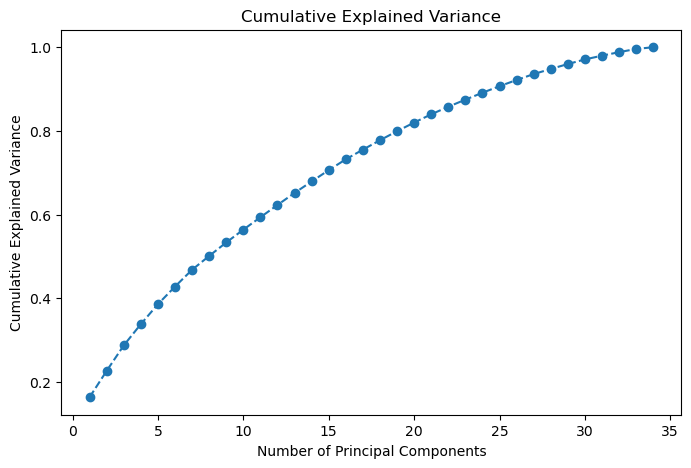

Reduced DataFrame:
            PC1       PC2
0      0.870194  4.507469
1      0.076628  0.294204
2     -2.748855 -0.244150
3     -0.712009  0.768549
4      1.195035 -2.116113
...         ...       ...
19978 -2.260811  2.331139
19979 -1.424883  1.396987
19980 -0.910823  0.045607
19981  3.092284  0.386227
19982  3.456059 -1.882424

[19983 rows x 2 columns]


In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Standardize the Data (mean = 0, variance = 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 2. Apply PCA
pca = PCA()  # You can specify n_components to limit dimensions
pca_data = pca.fit_transform(scaled_data)

# 3. Create a DataFrame for Principal Components
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])

# Display the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Optional: Select the number of components based on explained variance
n_components = 2  # For example, retain 2 components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

# Create a reduced DataFrame for the selected components
reduced_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])
print("Reduced DataFrame:")
print(reduced_df)


In [18]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19983 entries, 0 to 19982
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ads_id             19983 non-null  int64  
 1   prop_name          19983 non-null  float64
 2   completion_year    19983 non-null  float64
 3   monthly_rent       19983 non-null  float64
 4   property_type      19983 non-null  float64
 5   rooms              19983 non-null  float64
 6   parking            19983 non-null  float64
 7   bathroom           19983 non-null  float64
 8   size               19983 non-null  int64  
 9   furnished          19983 non-null  float64
 10  region             19983 non-null  float64
 11  10                 19983 non-null  int64  
 12  11                 19983 non-null  int64  
 13  6                  19983 non-null  int64  
 14  Barbeque area      19983 non-null  int64  
 15  Club house         19983 non-null  int64  
 16  Gymnasium          199

,ads_id,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,...,Security,Squash Court,Swimming Pool,Tennis Court,Air-Cond,Cooking Allowed,Internet,Near KTM/LRT,Washing Machine,specific_location
0,100323185,2502.0,2022.0,4200.0,3.0,5.0,2.000000,6.0,1842,0.0,...,1,0,1,0,1,1,0,0,1,121.0
1,100203973,1941.0,2017.0,2300.0,3.0,3.0,1.000000,2.0,1170,2.0,...,1,0,1,0,1,1,0,1,0,40.0
2,100323128,1564.0,2017.0,1000.0,0.0,3.0,1.416824,2.0,650,0.0,...,0,0,1,0,1,1,0,0,1,121.0
3,100191767,1974.0,2020.0,1700.0,0.0,2.0,1.000000,2.0,743,2.0,...,1,1,1,0,0,1,0,1,1,102.0
4,97022692,192.0,2017.0,1299.0,9.0,1.0,1.000000,1.0,494,1.0,...,1,0,1,0,1,0,0,0,0,77.0


In [19]:
# Separate features and target 
X = data.drop('monthly_rent', axis=1)
y = data['monthly_rent']